### Day36.YOLO 細節理解-網絡架構      
用實際的影像，嘗試自己搭建一個 1乘1和 3乘 3的模型    
看通過 1乘1和 3乘3 卷積層後會有甚麼變化?     
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化     

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Activation

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [2]:
print( 'TensorFlow Version: ', tf.__version__ )
print( 'Keras Version: ', tf.keras.__version__ ) 

TensorFlow Version:  2.2.0
Keras Version:  2.3.0-tf


Shape of Image: (576, 768, 3)


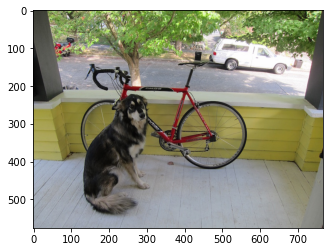

In [3]:
# 讀入照片
img_path = 'D:/Tom/GitHub/DL_CVMarathon/IMAGE/Day_032/Dog.jpg'
img_bgr = cv2.imread( img_path )
print( 'Shape of Image:', img_bgr.shape )
def show(img_bgr):
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # plt.imshow 預設圖片是 rgb 的
    plt.show()
show(img_bgr)

In [4]:
# 建立模型
'''
Sequential 是一個多層模型，透過 add() 函式將一層一層 layer 加上去。
註 : data_format='channels_last' 尺寸為 (batch,rows,cols,channels)
'''
model = Sequential()
model.add( Conv2D( 3, (1,1), padding="same", 
                   data_format='channels_last',
                   activation='relu',
                   input_shape = img_bgr.shape))

model.add( Conv2D( 4, (3,3), padding="same", 
                   data_format='channels_last',
                   activation='relu'))

print( model.summary() )
#權重都是亂數值

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 576, 768, 4)       112       
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
'''
Keras 在讀取檔案時，是以 batch 的方式一次讀取多張。
但我們這裡只需要判讀一張，所以透過 expand_dims() 函式來多擴張一個維度
'''
from tensorflow.keras.preprocessing.image import img_to_array

#img_bgr = img_to_array( img_bgr )
image_batch = np.expand_dims( img_bgr, axis=0 )
print( image_batch.shape )

(1, 576, 768, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 4)


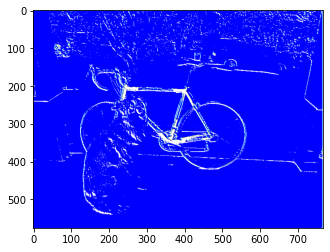

In [6]:
'''
model.predict() 函式，得到回傳便是 Feature Map。
'''
image_conv = model.predict( image_batch )
img = np.squeeze( image_conv,axis=0 )
print( img.shape )
plt.imshow( img )

#### 由於權重都是亂數值，所以每次跑出來的結果不同
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 576, 768, 3)       84        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 576, 768, 3)       228       
Total params: 324
Trainable params: 324
Non-trainable params: 0
_________________________________________________________________
None


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 3)


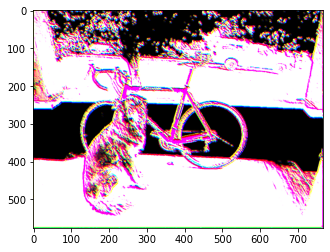

In [7]:
model_2 = Sequential()
model_2.add( Conv2D( 3, (1,1), padding="same", 
                     data_format='channels_last',
                     activation='relu',
                     input_shape = img_bgr.shape ) )

model_2.add( Conv2D( 3, (3,3), padding="same", 
                     data_format='channels_last',
                     activation='relu' ) )

model_2.add( Conv2D( 3, (5,5), padding="same", 
                     data_format='channels_last',
                     activation='relu' ) )

print( model_2.summary() )

image_conv_2 = model_2.predict( image_batch )
img_2 = np.squeeze( image_conv_2,axis=0 )
print( img_2.shape )
plt.imshow( img_2 )